# I. Start CAS Session and Load Action Sets

In [1]:
from swat import *

In [2]:
s = CAS('nvidia05.perf.sas.com',10466)
s.sessionprop.setsessopt(caslib='CASUSER',timeout=3.1536E7)


NOTE: 'CASUSER(renaza)' is now the active caslib.


+ Elapsed: 0.00188s, user: 0.0018s, mem: 0.262mb

In [3]:
s.loadactionset('reinforcementLearn')

NOTE: Added action set 'reinforcementLearn'.


[actionset]

 'reinforcementLearn'

+ Elapsed: 0.357s, user: 1.35s, sys: 1.24s, mem: 0.22mb

# II. Train Model with DQN Algorithm

## 1. Train the Q-Network

This is the entrypoint of training with the DQN algorithm. 

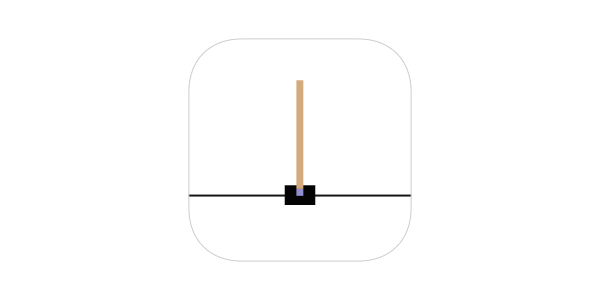

In [4]:
from IPython.display import Image
Image("cartpole_img.png")
# ![title](cartpole_img.png)

In [5]:
s.rlTrainDQN(
    # environment
    environment=dict(type='builtin', name='CartPole-v0'),
    
    # specify training hyperparameters
    numEpisodes=200,                # number of episodes to train
    gamma = 0.99,                   # discount factor 

    
    # parameters for replay memory
    minReplayMemory=1000,           # minimum number of transitions in replay memory to start the training
    maxReplayMemory=10000,          # maximum number of transitions that can be stored in replay memory
    
       
    # define the structure of the Q-Network
    QModel= [{'type':'fc', 'n':32, 'act':'relu'}, 
            {'type':'fc', 'n':32, 'act':'relu'}], # or you can simply use QModel=[32, 32] to define the same Q-Network
                                                  #     with two hidden layers and relu activation function
    seed = 1234,                    # initial seed for initializing the weights of Q-Network and exploration
    gpu=True,                       # use gpu device if available 
   
    # optimizer setting
    optimizer=dict(method='ADAM', learningRate=0.001, miniBatchSize=64), # how to update the Q-Network weights
    
    # parameters for exploration policy
    exploration=dict(type='linear', initialEpsilon=1, minEpsilon=0.05), # controls the e-greedy policy

    # parameters for target Q-Network
    targetUpdateInterval = 100,     # the frequency at which the target Q-Network is updated. Here, it is synchronized with  
                                    #     the main Q-Network after every 100 trainsteps
    
    # test quality of Q-Network
    testInterval=20,                # how often to test the quality of the trained Q-Network using greedy policy
    numTestEpisodes=10,             # how many episodes to sample in test time
    
    # output table
    modelOut=dict(name='dqnWeights', replace=True), 
) 


NOTE: Using GPU 1 on nvidia05.perf.sas.com.
         Episode=        0 AvgQValue=     0 AvgTarget=     0 AvgLoss=     0 TestReward=   9.4
         Episode=       20 AvgQValue=     0 AvgTarget=     0 AvgLoss=     0 TestReward=   9.6
         Episode=       40 AvgQValue=0.4814 AvgTarget=1.1838 AvgLoss= 0.601 TestReward=   9.4
         Episode=       60 AvgQValue=5.0481 AvgTarget=4.9679 AvgLoss=0.4247 TestReward=  34.5
         Episode=       80 AvgQValue=9.6481 AvgTarget=9.8384 AvgLoss=1.0485 TestReward=  39.6
         Episode=      100 AvgQValue=22.157 AvgTarget=22.584 AvgLoss=3.1416 TestReward= 131.2
         Episode=      120 AvgQValue=43.195 AvgTarget=43.754 AvgLoss=1.4444 TestReward= 170.9
         Episode=      140 AvgQValue=68.359 AvgTarget=68.258 AvgLoss=1.6463 TestReward= 199.6
         Episode=      160 AvgQValue=83.289 AvgTarget=83.759 AvgLoss=3.6933 TestReward= 161.5
         Episode=      180 AvgQValue=73.442 AvgTarget=73.275 AvgLoss=0.5405 TestReward=   200
NOTE: Reinforcem

[ModelInfo]

             Number of levels Value
 0  Number of State Variables     4
 1          Number of Actions     2
 2                   Training   DQN
 3                  Optimizer  ADAM

[OptIterHistory]

 Iteration History
 
    Iteration      AvgQValue      AvgTarget   AvgLoss  Test Reward
 0          0  1.038344e-317  1.038344e-317  0.000000          9.4
 1         20  1.038344e-317  1.038344e-317  0.000000          9.6
 2         40   4.814167e-01   1.183753e+00  0.600951          9.4
 3         60   5.048073e+00   4.967938e+00  0.424654         34.5
 4         80   9.648090e+00   9.838372e+00  1.048504         39.6
 5        100   2.215701e+01   2.258433e+01  3.141615        131.2
 6        120   4.319516e+01   4.375410e+01  1.444392        170.9
 7        140   6.835875e+01   6.825792e+01  1.646285        199.6
 8        160   8.328889e+01   8.375878e+01  3.693274        161.5
 9        180   7.344195e+01   7.327458e+01  0.540528        200.0

[FinalResult]

             Description       Value
 0        Average QValue   73.441951
 1  Average Target Value   73.274576
 2           Test Reward  200.000000

+ Elapsed: 65.6s, user: 62.3s, sys: 1.44s, mem: 1.67mb

In [6]:
s.fetch('dqnWeights', to=5)

,_LayerID_,_WeightID_,_Weight_,_Grad_
0,1.0,0.0,-0.461136,NaN
1,1.0,1.0,0.001007,NaN
2,1.0,2.0,-0.586647,NaN
3,1.0,3.0,0.028144,NaN
4,1.0,4.0,0.013647,NaN


## 2. Save Weights

In [7]:
# this will save models to the home directory of the user on the remote machine
s.table.save(table = "dqnWeights", name = "dqnWeights-weights.sashdat", replace = True)
s.table.attribute(task ='CONVERT', name = 'dqnWeights')
s.table.save(table = "dqnWeights.attrs", name = "dqnWeights-attrs.sashdat", replace = True)


NOTE: Cloud Analytic Services saved the file dqnWeights-weights.sashdat in caslib CASUSER(renaza).
NOTE: Cloud Analytic Services saved the file dqnWeights-attrs.sashdat in caslib CASUSER(renaza).


[caslib]

 'CASUSER(renaza)'

[name]

 'dqnWeights-attrs.sashdat'

+ Elapsed: 0.0531s, user: 0.0311s, sys: 0.0141s, mem: 16.5mb

## 3. Load Weights

In [8]:
# to be able to upload the models, they should be on your local machine
s.upload("./dqnWeights-Weights.sashdat", casout={"name":"dqnWeights","replace":True})
s.upload("./dqnWeights-attrs.sashdat", casout={"name":"dqnWeights-attrs","replace":True})
s.table.attribute(table='dqnWeights-attrs', task ='ADD', name = 'dqnWeights')


NOTE: Cloud Analytic Services made the uploaded file available as table DQNWEIGHTS in caslib CASUSER(renaza).
NOTE: The table DQNWEIGHTS has been created in caslib CASUSER(renaza) from binary data uploaded to Cloud Analytic Services.
NOTE: Cloud Analytic Services made the uploaded file available as table DQNWEIGHTS-ATTRS in caslib CASUSER(renaza).
NOTE: The table DQNWEIGHTS-ATTRS has been created in caslib CASUSER(renaza) from binary data uploaded to Cloud Analytic Services.


+ Elapsed: 0.00178s, user: 0.00173s, mem: 0.3mb

# III. Score Trained Model

For off-policy algorithms such as DQN, you may either score using an environment or from a data table.

In [9]:
s.rlScore(
    # CAS table that includes trained weights and attributes
    model='dqnWeights',
    
    # the environment to score
    environment=dict(type='builtin', name='CartPole-v0'), 
    
    # number of episodes to score
    numEpisodes=5,

    # output config
    casout=dict(name='scoreTable', replace=True),
    logFreq=1,
    writeQValues=True,
)

         Episode=        1 Step=        1 LastReward=     0 AverageReward=     1
         Episode=        1 Step=        2 LastReward=     0 AverageReward=     2
         Episode=        1 Step=        3 LastReward=     0 AverageReward=     3
         Episode=        1 Step=        4 LastReward=     0 AverageReward=     4
         Episode=        1 Step=        5 LastReward=     0 AverageReward=     5
         Episode=        1 Step=        6 LastReward=     0 AverageReward=     6
         Episode=        1 Step=        7 LastReward=     0 AverageReward=     7
         Episode=        1 Step=        8 LastReward=     0 AverageReward=     8
         Episode=        1 Step=        9 LastReward=     0 AverageReward=     9
         Episode=        1 Step=       10 LastReward=     0 AverageReward=    10
         Episode=        1 Step=       11 LastReward=     0 AverageReward=    11
         Episode=        1 Step=       12 LastReward=     0 AverageReward=    12
         Episode=        1 S

         Episode=        1 Step=      137 LastReward=     0 AverageReward=   137
         Episode=        1 Step=      138 LastReward=     0 AverageReward=   138
         Episode=        1 Step=      139 LastReward=     0 AverageReward=   139
         Episode=        1 Step=      140 LastReward=     0 AverageReward=   140
         Episode=        1 Step=      141 LastReward=     0 AverageReward=   141
         Episode=        1 Step=      142 LastReward=     0 AverageReward=   142
         Episode=        1 Step=      143 LastReward=     0 AverageReward=   143
         Episode=        1 Step=      144 LastReward=     0 AverageReward=   144
         Episode=        1 Step=      145 LastReward=     0 AverageReward=   145
         Episode=        1 Step=      146 LastReward=     0 AverageReward=   146
         Episode=        1 Step=      147 LastReward=     0 AverageReward=   147
         Episode=        1 Step=      148 LastReward=     0 AverageReward=   148
         Episode=        1 S

         Episode=        2 Step=      399 LastReward=   200 AverageReward= 199.5
         Episode=        2 Step=      400 LastReward=   200 AverageReward=   200
         Episode=        3 Step=      401 LastReward=   200 AverageReward=133.67
         Episode=        3 Step=      402 LastReward=   200 AverageReward=   134
         Episode=        3 Step=      403 LastReward=   200 AverageReward=134.33
         Episode=        3 Step=      404 LastReward=   200 AverageReward=134.67
         Episode=        3 Step=      405 LastReward=   200 AverageReward=   135
         Episode=        3 Step=      406 LastReward=   200 AverageReward=135.33
         Episode=        3 Step=      407 LastReward=   200 AverageReward=135.67
         Episode=        3 Step=      408 LastReward=   200 AverageReward=   136
         Episode=        3 Step=      409 LastReward=   200 AverageReward=136.33
         Episode=        3 Step=      410 LastReward=   200 AverageReward=136.67
         Episode=        3 S

         Episode=        3 Step=      565 LastReward=   200 AverageReward=188.33
         Episode=        3 Step=      566 LastReward=   200 AverageReward=188.67
         Episode=        3 Step=      567 LastReward=   200 AverageReward=   189
         Episode=        3 Step=      568 LastReward=   200 AverageReward=189.33
         Episode=        3 Step=      569 LastReward=   200 AverageReward=189.67
         Episode=        3 Step=      570 LastReward=   200 AverageReward=   190
         Episode=        3 Step=      571 LastReward=   200 AverageReward=190.33
         Episode=        3 Step=      572 LastReward=   200 AverageReward=190.67
         Episode=        3 Step=      573 LastReward=   200 AverageReward=   191
         Episode=        3 Step=      574 LastReward=   200 AverageReward=191.33
         Episode=        3 Step=      575 LastReward=   200 AverageReward=191.67
         Episode=        3 Step=      576 LastReward=   200 AverageReward=   192
         Episode=        3 S

         Episode=        4 Step=      735 LastReward=   200 AverageReward=183.75
         Episode=        4 Step=      736 LastReward=   200 AverageReward=   184
         Episode=        4 Step=      737 LastReward=   200 AverageReward=184.25
         Episode=        4 Step=      738 LastReward=   200 AverageReward= 184.5
         Episode=        4 Step=      739 LastReward=   200 AverageReward=184.75
         Episode=        4 Step=      740 LastReward=   200 AverageReward=   185
         Episode=        4 Step=      741 LastReward=   200 AverageReward=185.25
         Episode=        4 Step=      742 LastReward=   200 AverageReward= 185.5
         Episode=        4 Step=      743 LastReward=   200 AverageReward=185.75
         Episode=        4 Step=      744 LastReward=   200 AverageReward=   186
         Episode=        4 Step=      745 LastReward=   200 AverageReward=186.25
         Episode=        4 Step=      746 LastReward=   200 AverageReward= 186.5
         Episode=        4 S

,Number of levels,Value
0,Number of State Variables,4
1,Number of Actions,2
2,Training,DQN
3,Optimizer,ADAM


In [10]:
s.fetch('scoreTable', to=5)

,_Step_,_Episode_,_S0_,_S1_,_S2_,_S3_,_Action_,_Reward_,_Done_,_QVal_0_,_QVal_1_
0,0.0,1.0,-0.044548,-0.030393,-0.037056,-0.046217,0.0,1.0,0.0,95.100635,94.448846
1,1.0,1.0,-0.045155,-0.224965,-0.037980,0.234548,0.0,1.0,0.0,95.023203,94.741552
2,2.0,1.0,-0.049655,-0.419524,-0.033289,0.515013,1.0,1.0,0.0,94.678657,94.963747
3,3.0,1.0,-0.058045,-0.223949,-0.022989,0.212029,0.0,1.0,0.0,94.651473,94.543316
4,4.0,1.0,-0.062524,-0.418735,-0.018748,0.497372,1.0,1.0,0.0,94.275430,94.763257
